In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras import backend as K
np.random.seed(7)


print ('here')

here


In [2]:
import zipfile
import os
if not os.listdir('C:\Jupyter projects\Fruit recognition'):
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('C:\Jupyter projects\Fruit recognition')
print ('hereeee')
print (2+3)

hereeee
5


In [3]:
import pandas as pd
images = []

dirp = 'C:\Jupyter projects\Fruit recognition'
cou = 0
for fruit in os.listdir(dirp):
    for im in os.listdir(dirp+"\\"+fruit):
        if not (('total' in im) or ('Total' in im)) and 'png' in im: 
            images += [[fruit, dirp+"\\"+fruit+"\\"+im] ]
            cou += 1
            if (cou % 10000 == 0):
                print(dirp+"\\"+fruit+"\\"+im)
        elif not (('total' in im) or ('Total' in im)):
            for subim in os.listdir(dirp + "\\" + fruit + "\\" + im):
                images += [[fruit, dirp + "\\" + fruit + "\\" + im+"\\"+subim]]
                cou += 1
                if (cou % 10000 == 0):
                    print(dirp+"\\"+fruit+"\\"+im+"\\"+subim)

df = pd.DataFrame(images, columns = ["fruit", "path"])
fruit_names = sorted(df.fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
print (mapper_fruit_names)
df["label"] = df["fruit"].map(mapper_fruit_names)
df

C:\Jupyter projects\Fruit recognition\Carambola\Carambola 001729.png
C:\Jupyter projects\Fruit recognition\Mango\Mango00217.png
C:\Jupyter projects\Fruit recognition\Peach\Peach00484.png
C:\Jupyter projects\Fruit recognition\Plum\PlumπÇé59.png
{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


,fruit,path,label
0,Apple,C:\Jupyter projects\Fruit recognition\Apple\Ap...,0
1,Apple,C:\Jupyter projects\Fruit recognition\Apple\Ap...,0
2,Apple,C:\Jupyter projects\Fruit recognition\Apple\Ap...,0
3,Apple,C:\Jupyter projects\Fruit recognition\Apple\Ap...,0
4,Apple,C:\Jupyter projects\Fruit recognition\Apple\Ap...,0
...,...,...,...
44787,Tomatoes,C:\Jupyter projects\Fruit recognition\Tomatoes...,13
44788,Tomatoes,C:\Jupyter projects\Fruit recognition\Tomatoes...,13
44789,Tomatoes,C:\Jupyter projects\Fruit recognition\Tomatoes...,13
44790,Tomatoes,C:\Jupyter projects\Fruit recognition\Tomatoes...,13


In [4]:
from sklearn.model_selection import train_test_split

num_rows = len(df.index)

df = df.sample(frac = 1.0)

X_path = df['path']
y = df['label']

X_train_path, X_test_path, y_train_old, y_test_old = train_test_split(X_path, y, test_size=0.2, random_state=7, stratify=y)

import cv2

X_train = []
X_test = []
y_train = []
y_test = []

for i in range(num_rows):
    if i%1000 == 0:
            print(str(i)+":")
    if i in X_train_path:
        X_train.append( cv2.resize(plt.imread(X_train_path[i]), (100, 100) ) )
        y_train.append(y_train_old[i])
    elif i in X_test_path:
        X_test.append( cv2.resize(plt.imread(X_test_path[i]), (100, 100)))
        y_test.append(y_test_old[i])

0:
1000:
2000:
3000:
4000:
5000:
6000:
7000:
8000:
9000:
10000:
11000:
12000:
13000:
14000:
15000:
16000:
17000:
18000:
19000:
20000:
21000:
22000:
23000:
24000:
25000:
26000:
27000:
28000:
29000:
30000:
31000:
32000:
33000:
34000:
35000:
36000:
37000:
38000:
39000:
40000:
41000:
42000:
43000:
44000:


[20681, 1817, 34635, 14630, 21443, 18667, 490, 6212, 6503, 82, 33022, 16528, 11549, 21700, 15463, 18369, 25407, 4031, 25172, 11074]


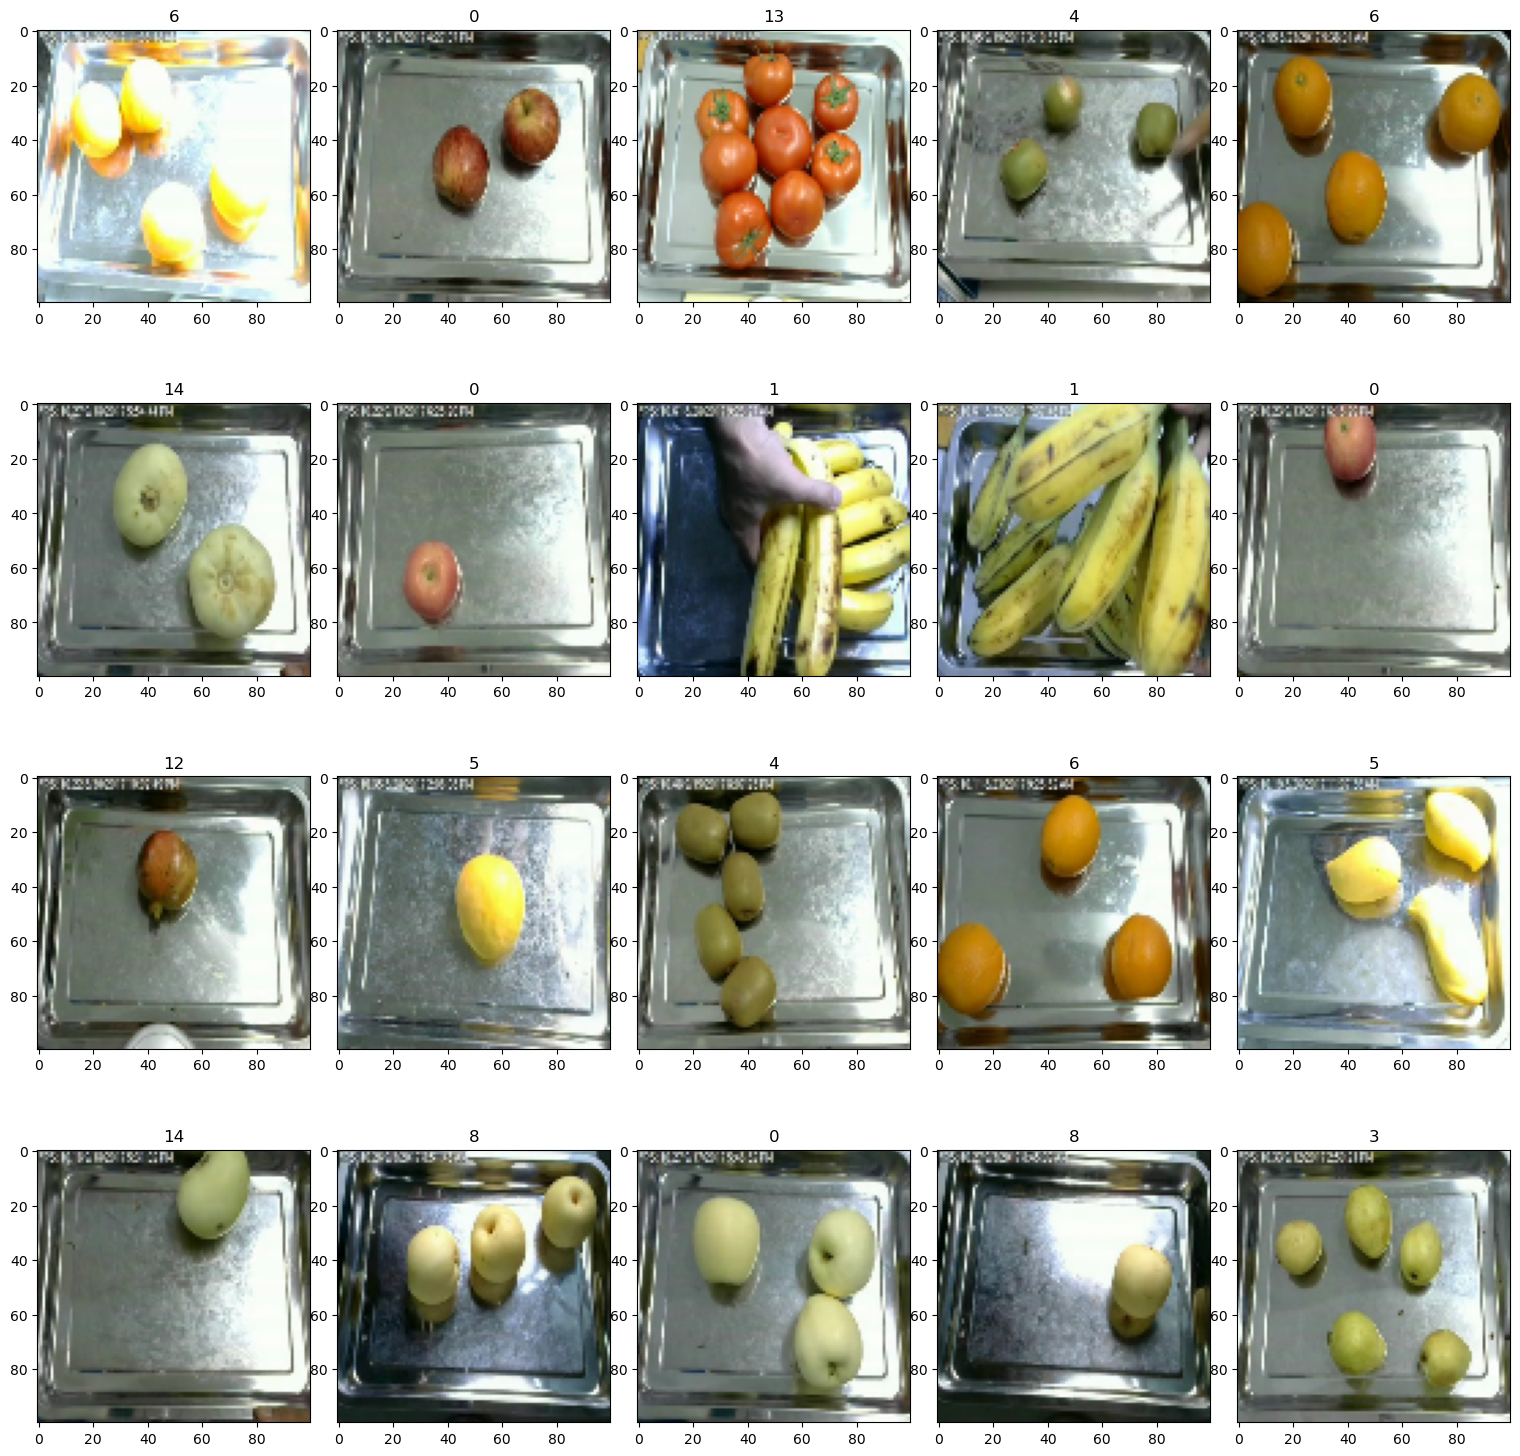

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))

import random

random20 = random.choices(range(len(X_train)), k=20)
print(random20)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random20[i]]);
    ax.set_title(y_train[random20[i]], fontsize = 12)
plt.tight_layout(pad=0.0)
plt.show()


In [6]:
len(X_train)

img_rows = 100
img_cols = 100

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=7, stratify=y_train)

X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 3)    
    input_shape = (img_rows, img_cols, 3)

In [7]:
#def change_type(lst):
#    return list(map(lambda x: change_type(x) if type(x) in [list, tuple] else float(x), lst))

model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(0.25),
    Flatten(),
    Dense(96, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])




In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        1

In [9]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
batch_size = 256
epochs = 32

y_train = utils.to_categorical(y_train, 15)
y_valid = utils.to_categorical(y_valid, 15)
y_test = utils.to_categorical(y_test, 15)

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Epoch 1/32
112/112 [==============================] - 933s 8s/step - loss: 1.6696 - accuracy: 0.4527 - val_loss: 0.4641 - val_accuracy: 0.8609
Epoch 2/32
112/112 [==============================] - 1162s 10s/step - loss: 0.5637 - accuracy: 0.8062 - val_loss: 0.2297 - val_accuracy: 0.9187
Epoch 3/32
112/112 [==============================] - 1149s 10s/step - loss: 0.3517 - accuracy: 0.8753 - val_loss: 0.1701 - val_accuracy: 0.9364
Epoch 4/32
112/112 [==============================] - 1189s 11s/step - loss: 0.2800 - accuracy: 0.9009 - val_loss: 0.1460 - val_accuracy: 0.9474
Epoch 5/32
112/112 [==============================] - 1172s 10s/step - loss: 0.2100 - accuracy: 0.9233 - val_loss: 0.1164 - val_accuracy: 0.9572
Epoch 6/32
112/112 [==============================] - 1177s 11s/step - loss: 0.1733 - accuracy: 0.9371 - val_loss: 0.1058 - val_accuracy: 0.9600
Epoch 7/32
112/112 [==============================] - 1183s 11s/step - loss: 0.1606 - accuracy: 0.9410 - val_loss: 0.1236 - val_accu

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

y_predicted = model.predict(X_test)
y_predicted_classes = np.argmax(y_predicted, axis = 1) 

y_test_classes = np.argmax(y_test, axis = 1) 

confusion_matrix= confusion_matrix(y_test_classes, y_predicted_classes)

report = classification_report(y_test_classes, y_predicted_classes)

280/280 [==============================] - 86s 294ms/step


In [11]:
print(confusion_matrix)
print(report)
print(mapper_fruit_names)

[[1170    1    0    0    0    1    0   11   40    0    0    0    0    0
     9]
 [   4  567    0    0    0   12    0    0   23    0    0    0    0    0
     0]
 [   0    0  416    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0  628    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0  859    0    0    0    0    0    0    0    0    0
     0]
 [   2    1    0    0    0  819    1    0    7    0    0    0    1    0
     0]
 [   0    0    0    0    0    0  594    0    0    8    0    0    0    0
     0]
 [   3    0    0    0    0    0    0  521    2    0    0    0    0    0
     0]
 [   6    1    0    0    0    2    0    1  592    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0  413    0    0    1    0
     0]
 [   8    0    0    0    0    0    0    8    0    0  484    0    0    0
     0]
 [   0    0    0    0    0    0    0    1    0    0    0  459    0    0
     0]
 [   3   11    0    0    0   41    0    

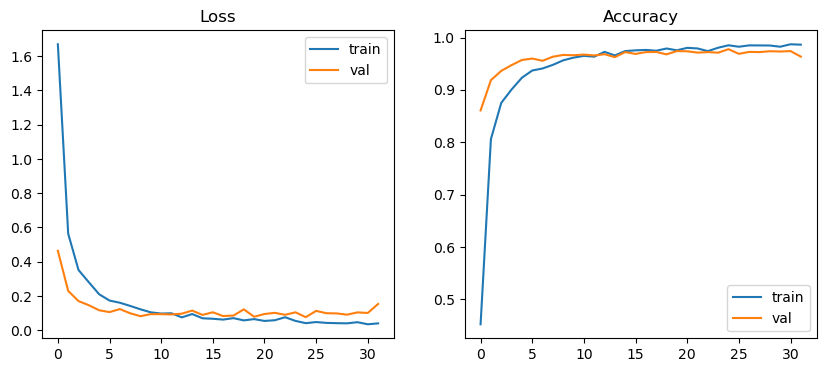

In [12]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(0, epochs), history.history['loss'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='val')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='val')
plt.legend(loc='best')

plt.show()